In [0]:
import tensorflow as tf

print('tf version: ', tf.__version__)
print('keras version: ', tf.keras.__version__)

tf version:  1.14.0
keras version:  2.2.4-tf


In [0]:
!pip uninstall tensorflow
!pip uninstall tensorflow-gpu
!pip install tensorflow-gpu==2.0.0-beta1

Uninstalling tensorflow-1.14.0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.14.0
     |████████████████████████████████| 348.9MB 34kB/s 
     |████████████████████████████████| 501kB 45.4MB/s 
     |████████████████████████████████| 3.1MB 43.1MB/s 


In [9]:
import tensorflow as tf

print('tf version: ', tf.__version__)
print('keras version: ', tf.keras.__version__)

tf version:  2.0.0-beta1
keras version:  2.2.4-tf


tf version:  2.0.0-beta1
keras version:  2.2.4-tf
11493376/11490434 [==============================] - 0s 0us/step
uint8
float64
x_train.shape = (60000, 28, 28) x_test.shape = (10000, 28, 28)


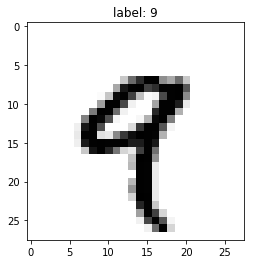

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2568 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1186 - accuracy: 0.9652
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0871 - accuracy: 0.9748
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0700 - accuracy: 0.9803
Epoch 5/5
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0930 - accuracy: 0.9740


[0.09296894393864787, 0.974]

In [0]:
import tensorflow as tf

print('tf version: ', tf.__version__)
print('keras version: ', tf.keras.__version__)

def show_mnist_data(i):
    import matplotlib.pyplot as plt
    image = x_train[i]
    label = y_train[i]
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title('label: {}'.format(y_train[i]))
    plt.show()

# 학습 데이터 (60000, 28, 28)와 훈련 데이터 (10000, 28, 28)마련
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.dtype) # uint8

x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.dtype) # float64

print('x_train.shape =', x_train.shape, 'x_test.shape =', x_test.shape)

show_mnist_data(4)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
              #optimizer='adam',
              optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습
model.fit(x_train, y_train, epochs=5) # 전체 학습 데이터 5번 반복 학습

# 학습 정확도 평가
model.evaluate(x_test, y_test)
